In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(7)
#데이터 로드, 처음 36행은 건너 뜀)
data = np.genfromtxt('c:/data/regression/x09.txt', skip_header=36)
data[:10]

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.]])

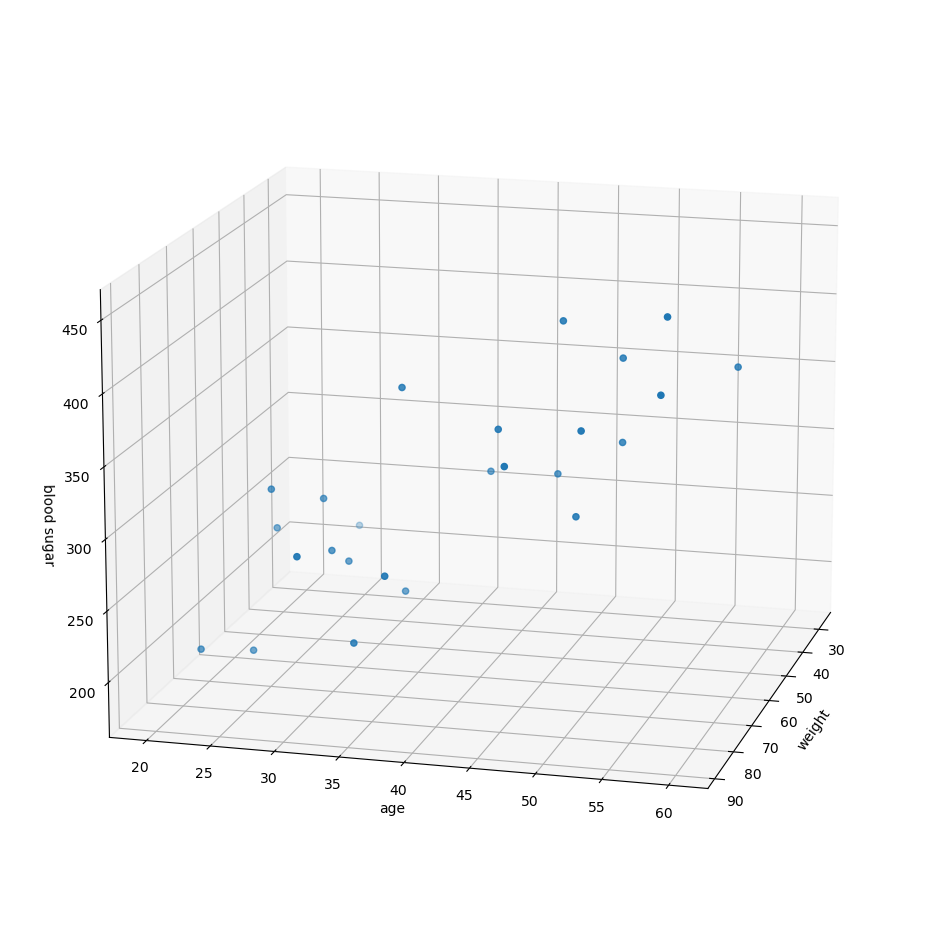

In [2]:
#산점도
from mpl_toolkits.mplot3d import Axes3D
xdata = np.array(data[:, 2], dtype=np.float32)
ydata = np.array(data[:, 3], dtype=np.float32)
zdata = np.array(data[:, 4], dtype=np.float32)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xdata, ydata, zdata)
ax.set_xlabel('weight')
ax.set_ylabel('age')
ax.set_zlabel('blood sugar')
ax.view_init(15, 15) # 출력 각도 설정
plt.show()

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
#데이터를 케라스에 맞게 변환
x_data = np.array(data[:, 2:4], dtype=np.float32)
y_data = np.array(data[:, 4], dtype=np.float32)

In [4]:
#회귀분석 모델 생성
model = Sequential()
model.add(Dense(1, input_shape=(2, )))
rmsprop = RMSprop(learning_rate=0.01) # 학습률
model.compile(loss='mse', optimizer=rmsprop)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


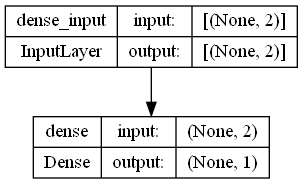

In [5]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [6]:
#모델 학습
hist = model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 690ms/step - loss: 160678.5781
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 157917.2656
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 155937.6250
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 154293.9688
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 152845.0938
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 151525.5469
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 150298.8438
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 149142.3594
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 148040.9844
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 146983.9375
Epoch 11/1000
1/1 [==============================] - 0s 3ms/step - loss: 145963.4062
Epoch 12/1000
1/1 [==============================] - 0s 4ms/step - loss:

In [7]:
print(hist.history.keys())

dict_keys(['loss'])


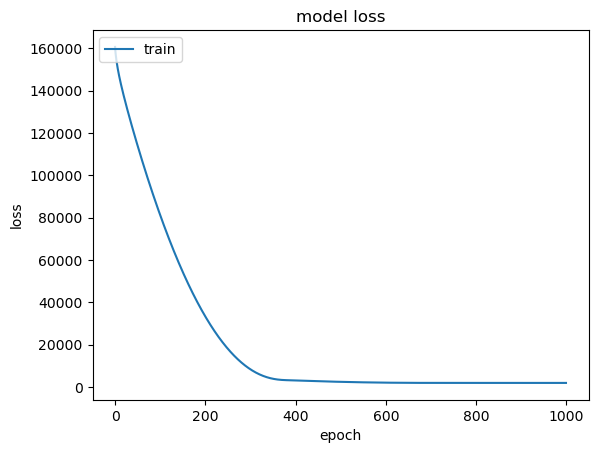

In [8]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [9]:
#새로운 데이터로 예측
# 체중 100kg, 40세
model.predict(np.array([100, 40]).reshape(1, 2)) # 2차원 배열로 변환

1/1 [==============================] - 0s 71ms/step


array([[350.51294]], dtype=float32)

In [10]:
# 체중 60kg, 25세
model.predict(np.array([[60, 25]]))

1/1 [==============================] - 0s 21ms/step


array([[219.60713]], dtype=float32)

In [11]:
#가중치와 편향
w, b = model.get_weights()
w, b

(array([[1.193854 ],
        [5.5434446]], dtype=float32),
 array([9.389774], dtype=float32))

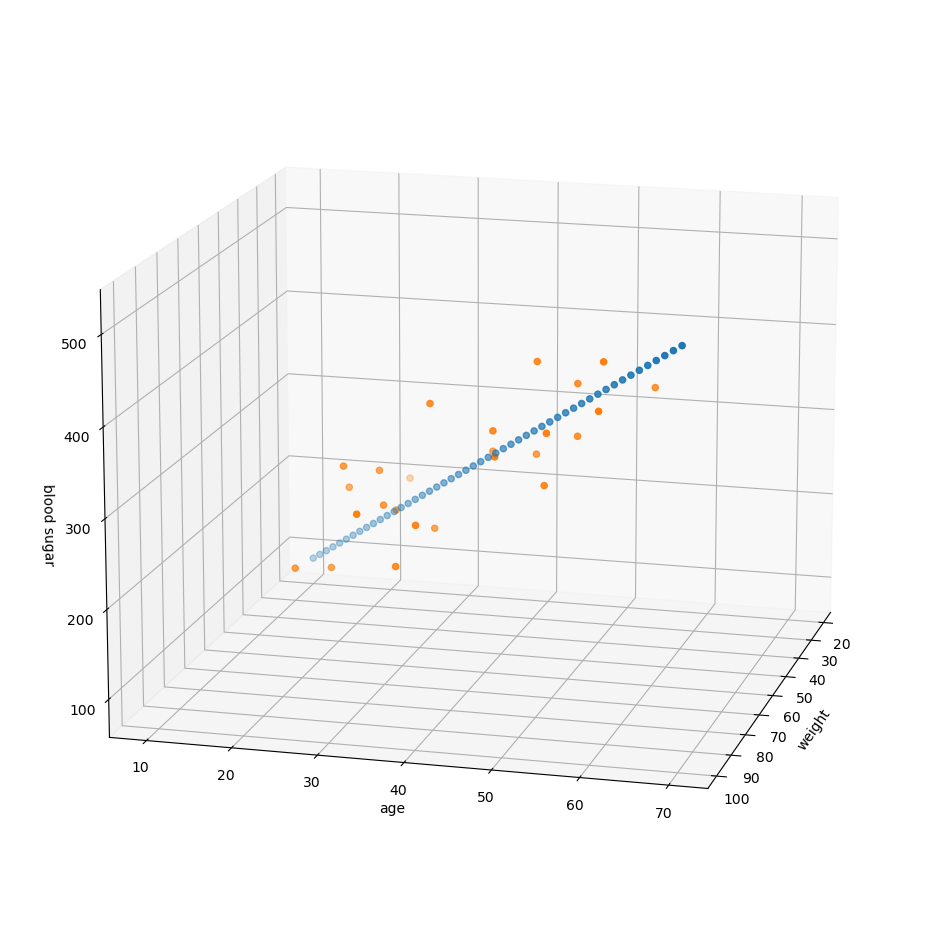

In [12]:
#회귀선 그리기
x=np.linspace(20,100,50).reshape(50,1)
y=np.linspace(10,70,50).reshape(50,1)
x2=np.concatenate((x,y),axis=1) # x,y연결

# 행렬곱셈
z=np.matmul(x2,w)+b
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')

# 회귀선
ax.scatter(x,y,z)

# 산점도
ax.scatter(xdata,ydata,zdata)
ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15,15)
plt.show()